In [ ]:
import pandas as pd
import numpy as np
#for EDA pkgs

In [ ]:
#load data VIz pkgs
import seaborn as sns

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
#load text cleaning pkgs
import neattext.functions as nfx

In [ ]:
!pip install scikit-learn

In [ ]:
#load ml pkgs
#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix



In [ ]:
#load dataset
df = pd.read_csv("/content/emotion_dataset_2.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
#valuecount
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

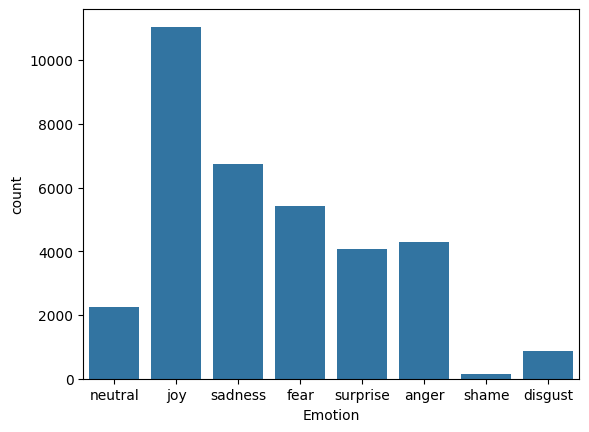

In [ ]:
#plot
sns.countplot(x='Emotion', data=df)

In [ ]:
#data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
#user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
#stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [ ]:
#features & labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']


In [ ]:
#split data
x_train,x_test, y_train,y_test = train_test_split(Xfeatures, ylabels, test_size=0.3,random_state=42)


In [ ]:
#build pipeline
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
#logisticregression pipeline

In [ ]:
#train and fit data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
#check accuracy
pipe_lr.score(x_test, y_test)


0.619946349875455

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#make a prediction
ex1 = "This book was so intersting it made me happy"

In [ ]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [ ]:
#prediction prob
pipe_lr.predict_proba([ex1])

array([[7.23168531e-03, 1.37296354e-02, 1.68185163e-02, 8.30514865e-01,
        3.13195687e-04, 1.11320814e-01, 1.57520776e-04, 1.99137677e-02]])

In [ ]:
#to know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
#save model & pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_23_march_2024.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install joblib

In [ ]:
%%writefile app.py
import streamlit as st
import altair as alt
import pandas as pd
import numpy as np
import joblib

pipe_lr = joblib.load(open("/content/emotion_classifier_pipe_lr_23_march_2024.pkl","rb"))

def predict_emotions(docx):
  results = pipe_lr.predict([docx])
  return results[0]

def get_prediction_proba(docx):
  results = pipe_lr.predict_proba([docx])
  return results

emotions_emoji_dict = {"anger":"😠","disgust":"🤮", "fear":"😨😱", "happy":"🤗", "joy":"😂", "neutral":"😐", "sad":"😔", "sadness":"😔", "shame":"😳", "surprise":"😮"}

def main():
  st.title("Feelings Unveiled: Analyze and Understand")
  menu=["Home","Working","About"]
  choice = st.sidebar.selectbox("Menu",menu)

  if choice == "Home":
    st.subheader("Decipher Your Emotions")

    with st.form(key='emotion_clf_form'):
      raw_text = st.text_area("Type here")
      submit_text = st.form_submit_button(label='Submit')
    if submit_text:
      col1,col2 = st.columns(2)

      prediction = predict_emotions(raw_text)
      probability = get_prediction_proba(raw_text)

      with col1:
        st.success("Original Text")
        st.write(raw_text)

        st.success("Prediction")
        emoji_icon = emotions_emoji_dict[prediction]
        st.write("{}:{}".format(prediction,emoji_icon))
        st.write("Confidence:{}".format(np.max(probability)))

      with col2:
        st.success("Prediction Probability")
        st.write(probability)
        proba_df = pd.DataFrame(probability, columns=pipe_lr.classes_)
        st.write(proba_df.T)
        proba_df_clean =  proba_df.T.reset_index()
        proba_df_clean.columns = ["emotions","probability"]

        fig = alt.Chart(proba_df_clean).mark_bar().encode(x='emotions',y='probability')
        st.altair_chart(fig,use_container_width=True)


  elif choice =="Working":
    st.subheader("The Engine Under the Hood: How We Operates Seamlessly")
    st. write("In the webpage there is text-box given, in the text-box enter the statement for which you want to detect the emotion and press ENTER.")
    st.write("After entering the input statement, the program will analyse the statement, word by word and show the emotion of that inputed statement.")
    st.write("Not only that, but also the program has the ability to show in a graphical manner that what are the emotions the inputed statement possess in it.")
  else:
    st.subheader("Your Digital Companion: Learn About Our App")
    st.write("This is a Emotion detection Web-App.")
    st.write("The App has the capability to take the input from the user and efficiently detect the all emotion present in it.")
    st.write("Made by Mousumi Dey")

if __name__ =='__main__':
  main()

Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.221.232.28


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.232.28:8501

npx: installed 22 in 3.52s
your url is: https://all-toys-shave.loca.lt


35.245.83.132


In [ ]:
!streamlit run app1.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
npx: installed 22 in 2.233s
your url is: https://gold-zebras-allow.loca.lt
^C
